In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib nbagg

In [12]:
raw_data = pd.read_csv('Traces/75533_T.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# Drop ID column
raw_data = raw_data.drop(['id'], axis=1)
raw_data = raw_data.drop(['time'], axis=1)

# Drop header and row-index
raw_values = raw_data.values

<IPython.core.display.Javascript object>


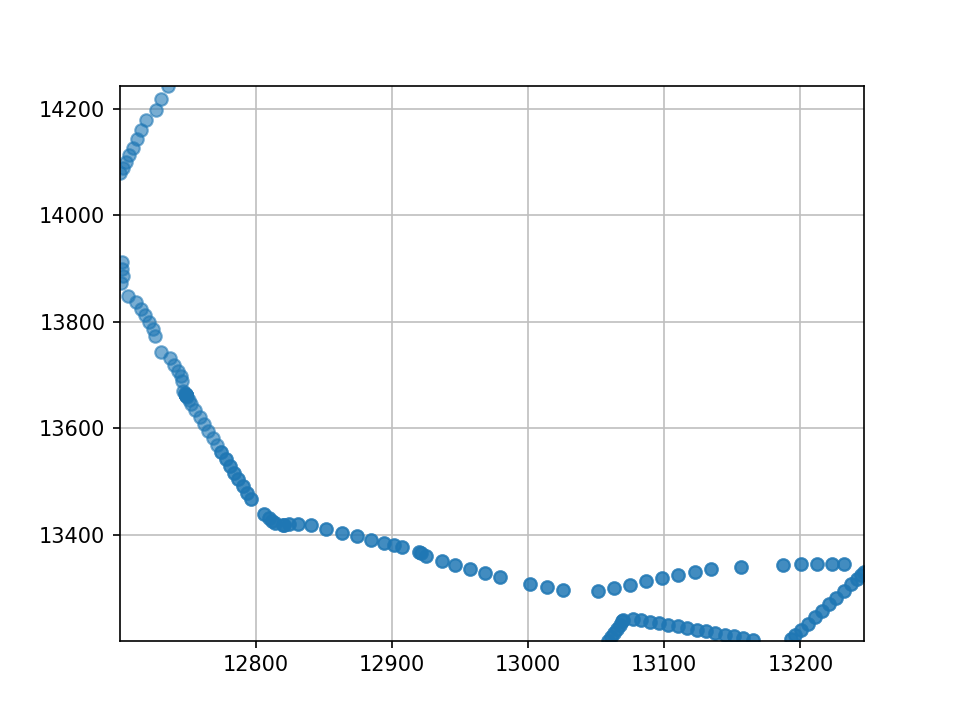

In [13]:
raw_x = raw_values[:, 0]
raw_y = raw_values[:, 1]


fig, ax = plt.subplots()
ax.grid(True, linestyle='-', color='0.75')
xdata, ydata = [], []
    
ln, = plt.plot([], [], 'o')

def init():
    ax.set_xlim(min(raw_x), max(raw_x))
    ax.set_ylim(min(raw_y), max(raw_y))
    return ln,

def update(frame):
    # DECOMMENTARE SE SI VUOLE TENERE TRACCIA DEL PERCORSO
    xdata.append(raw_x[frame])
    ydata.append(raw_y[frame])
    ln.set_data(xdata, ydata)
    '''
    ln.set_data(raw_x[frame], raw_y[frame])
    '''
    ln.set_alpha(0.6)
    return ln,

ani = FuncAnimation(fig, update, frames=len(raw_x), interval=100, init_func=init, blit=True)
plt.show()

<IPython.core.display.Javascript object>


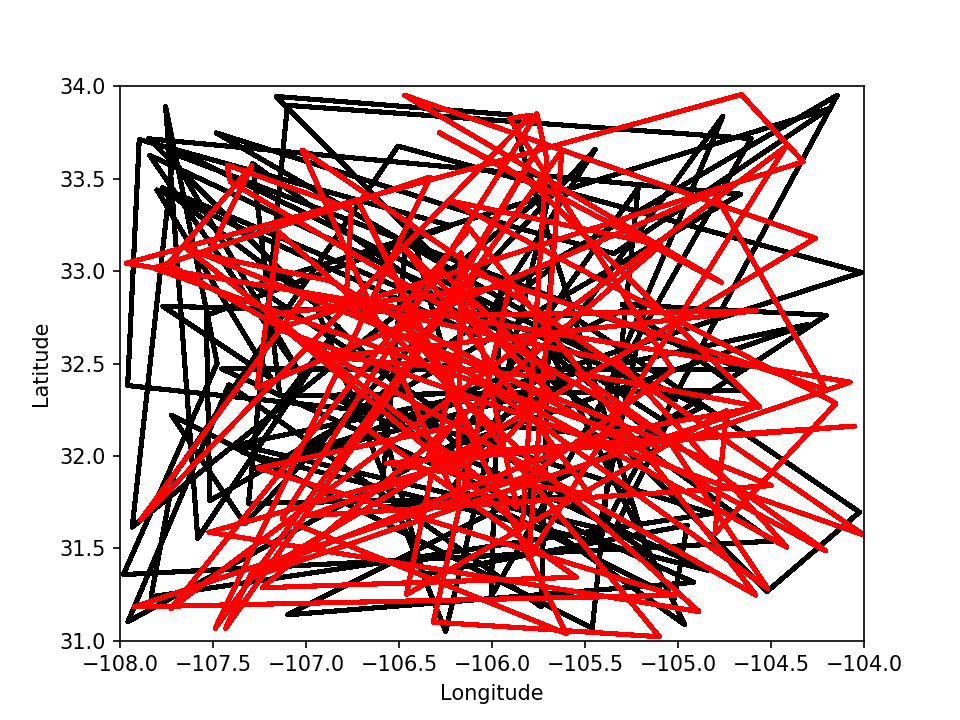

In [15]:
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy import random 

fig = plt.figure()
ax1 = plt.axes(xlim=(-108, -104), ylim=(31,34))
line, = ax1.plot([], [], lw=2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plotlays, plotcols = [2], ["black","red"]
lines = []
for index in range(2):
    lobj = ax1.plot([],[],lw=2,color=plotcols[index])[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

x1,y1 = [],[]
x2,y2 = [],[]

# fake data
frame_num = 100
gps_data = [-104 - (4 * random.rand(2, frame_num)), 31 + (3 * random.rand(2, frame_num))]


def animate(i):

    x = gps_data[0][0, i]
    y = gps_data[1][0, i]
    x1.append(x)
    y1.append(y)

    x = gps_data[0][1,i]
    y = gps_data[1][1,i]
    x2.append(x)
    y2.append(y)

    xlist = [x1, x2]
    ylist = [y1, y2]

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frame_num, interval=10, blit=True)


plt.show()